# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [5]:
# Import libraries
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt

In [6]:
# Your code here
zf = zipfile.ZipFile('data_all.zip')

In [7]:
data = pd.read_csv(zf.open('data_all.csv'))

In [8]:
data.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data['e'].value_counts()

1.0     6330
7.0     6139
3.0     5969
2.0     5869
0.0     5778
        ... 
41.0     400
20.0     382
60.0     381
51.0     368
45.0     317
Name: e, Length: 62, dtype: int64

In [10]:
data.shape

(116322, 785)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116322 entries, 0 to 116321
Columns: 785 entries, e to 784
dtypes: float64(785)
memory usage: 696.7 MB


In [12]:
data.iloc[0,1:]

1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
      ... 
780    0.0
781    0.0
782    0.0
783    0.0
784    0.0
Name: 0, Length: 784, dtype: float64

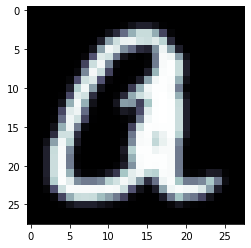

In [13]:
fig, ax = plt.subplots()
ax.imshow(np.array(data.iloc[0,1:]).reshape(28, 28), cmap=plt.cm.bone)

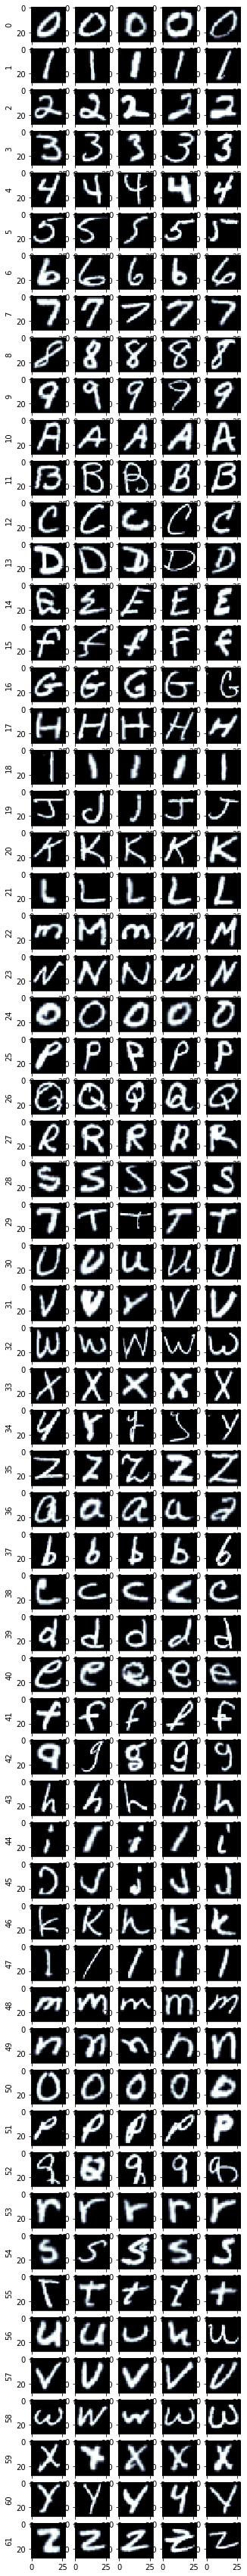

In [14]:
fig, ax = plt.subplots(62,5,figsize=(5,62))
for i,row in enumerate(ax):
    data_fil=data[data['e']==i]
    for j,cell in enumerate(row):
        cell.imshow(np.array(data_fil.iloc[j,1:]).reshape(28, 28), cmap=plt.cm.bone)#, interpolation='nearest')
        if j == 0:
            cell.set_ylabel(f'{i}')

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [15]:
data2=data.copy()

In [16]:
# Your code here
nume=[i for i in range(10)]
minu=[i for i in range(10,36)]
mayu=[i for i in range(36,62)]
data2['etiqueta'] = data2['e'].apply(lambda x:'numero' if x in nume else 'minuscula' if x in minu else 'mayuscula' if x in mayu else False)

In [17]:
data2['etiqueta'].value_counts()

numero       57918
minuscula    31345
mayuscula    27059
Name: etiqueta, dtype: int64

In [18]:
data_mayu=data2[data2.etiqueta=='mayuscula'].drop('etiqueta',axis=1)
data_mayu.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
data_min=data2[data2.etiqueta=='minuscula'].drop('etiqueta',axis=1)
data_min.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
data_num=data2[data2.etiqueta=='numero'].drop('etiqueta',axis=1)
data_num.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
from sklearn.model_selection import train_test_split as tts

In [24]:
from sklearn.naive_bayes import GaussianNB as GNB #Bayes para regresion 
from sklearn.naive_bayes import MultinomialNB as MNB #Bayes con variables discretas (categoricas)
from sklearn.naive_bayes import ComplementNB as CNB
from sklearn.naive_bayes import BernoulliNB as BNB  #Se basa en la dsitribucion binomial que a su vez son ensayos de bernoulli
#toma exitos y fracasos
from sklearn.neighbors import KNeighborsRegressor as KNNR
from sklearn.neighbors import KNeighborsClassifier as KNNC


#Modelos boosting
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import GradientBoostingClassifier as GBC

from xgboost import XGBRegressor as XGBR#Extreme Gradient Boosting
from xgboost import XGBClassifier as XGBC
from catboost import CatBoostClassifier as CATB
from catboost import CatBoostRegressor as CTR
from lightgbm import LGBMRegressor as LGBMR
from lightgbm import LGBMClassifier as LGBMC

In [25]:
lista_m = [XGBC, MNB, CNB, BNB]

In [26]:
def modeling_testing(lista_modelos, data, target):
    X_train, X_test, y_train, y_test = tts(data.loc[:, data.columns != target], data[target])
    
    for i in lista_modelos:
        modelo = i()
        modelo.fit(X_train, y_train)
        train_score = modelo.score(X_train, y_train)
        test_score = modelo.score(X_test, y_test)
        print('Modelo:',str(i).split(sep = '.')[-1])
        print('Train score:', train_score,'\nTest score:',test_score,'\n')

In [22]:
modeling_testing(lista_m, data_mayu, 'e')

Modelo: XGBClassifier'>
Train score: 1.0 
Test score: 0.8913525498891353 

Modelo: MultinomialNB'>
Train score: 0.6446240268059525 
Test score: 0.631189948263119 

Modelo: ComplementNB'>
Train score: 0.5138464570809106 
Test score: 0.5136733185513673 

Modelo: BernoulliNB'>
Train score: 0.6423080713511383 
Test score: 0.6323725055432372 



* Try to do the same thing with lowercases.

In [27]:
# Your code here

modeling_testing(lista_m, data_min, 'e')

Modelo: XGBClassifier'>
Train score: 1.0 
Test score: 0.9133597039683552 

Modelo: MultinomialNB'>
Train score: 0.6924451250638081 
Test score: 0.6968227638126834 

Modelo: ComplementNB'>
Train score: 0.4965118257614429 
Test score: 0.48934541278550464 

Modelo: BernoulliNB'>
Train score: 0.6958482218819125 
Test score: 0.6975883628939645 



* Try to do the same thing with numbers.

In [28]:
# Your code here

modeling_testing(lista_m, data_num, 'e')

Modelo: XGBClassifier'>
Train score: 1.0 
Test score: 0.9787983425414365 

Modelo: MultinomialNB'>
Train score: 0.8173718863667756 
Test score: 0.8122237569060774 

Modelo: ComplementNB'>
Train score: 0.7104608867811594 
Test score: 0.7107044198895027 

Modelo: BernoulliNB'>
Train score: 0.824393388277545 
Test score: 0.8165745856353591 

